In [146]:
# Importing all libraries
import pandas as pd
import numpy as np
import os
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
# Set current working directory
os.chdir('/home/nupur/Downloads')

In [ ]:
# Method to fetch data from an API
# Column names are found in [‘dataset’][‘column_names’]
# The data is found in [‘dataset’][‘data’]
''''import requests
import json
response=requests.get('API')
response_json=response.json()
df=pd.DataFrame(response_json['dataset']['data'], columns = response_json['dataset']['column_names'])
print(df))
df is our dataframe'''

In [148]:
# Load the data
data = pd.read_csv('2018-04-04.csv')
data.head(1000)

,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution
0,"Central School, Lucknow - CPCB",Lucknow,IN,2018-04-04T06:30:00.000Z,2018-04-04T12:00:00+05:30,so2,4.000000,µg/m³,26.882100,80.930275,"[{""name"":""Central Pollution Control Board"",""ur..."
1,"Sector - 62, Noida, UP - IMD",Noida,IN,2018-04-04T06:30:00.000Z,2018-04-04T12:00:00+05:30,no2,16.000000,µg/m³,28.624548,77.357710,"[{""name"":""Central Pollution Control Board"",""ur..."
2,"Sector - 62, Noida, UP - IMD",Noida,IN,2018-04-04T06:30:00.000Z,2018-04-04T12:00:00+05:30,co,48000.000000,µg/m³,28.624548,77.357710,"[{""name"":""Central Pollution Control Board"",""ur..."
3,"Central School, Lucknow - CPCB",Lucknow,IN,2018-04-04T06:30:00.000Z,2018-04-04T12:00:00+05:30,o3,45.000000,µg/m³,26.882100,80.930275,"[{""name"":""Central Pollution Control Board"",""ur..."
4,"Nishant Ganj, Lucknow - UPPCB",Lucknow,IN,2018-04-04T06:30:00.000Z,2018-04-04T12:00:00+05:30,no2,148.000000,µg/m³,26.871428,80.957145,"[{""name"":""Central Pollution Control Board"",""ur..."
...,...,...,...,...,...,...,...,...,...,...,...
431,Escuela E-10,Tocopilla,CL,2018-04-04T00:00:00.000Z,2018-04-03T21:00:00-03:00,pm10,23.470000,µg/m³,-22.085519,-70.188683,"[{""name"":""SINCA"",""url"":""http://sinca.mma.gob.c..."
432,Escuela E-10,Tocopilla,CL,2018-04-04T00:00:00.000Z,2018-04-03T21:00:00-03:00,so2,2.970000,µg/m³,-22.085519,-70.188683,"[{""name"":""SINCA"",""url"":""http://sinca.mma.gob.c..."
433,LV0008A,Rezekne,LV,2018-04-04T00:00:00.000Z,2018-04-04T03:00:00+03:00,o3,97.429688,µg/m³,56.510203,27.333369,"[{""name"":""EEA"",""url"":""http://www.eea.europa.eu..."
434,LV0008A,Rezekne,LV,2018-04-04T00:00:00.000Z,2018-04-04T03:00:00+03:00,no2,2.848877,µg/m³,56.510203,27.333369,"[{""name"":""EEA"",""url"":""http://www.eea.europa.eu..."


##### Data contains 436 observations with 11 variables.

In [149]:
# Selecting only indian data.
data1 = data[data['country'] == 'IN']

In [150]:
# Subset of data
data1=data1[['city','parameter','value','location']]
data1.head(1000)

,city,parameter,value,location
0,Lucknow,so2,4.0,"Central School, Lucknow - CPCB"
1,Noida,no2,16.0,"Sector - 62, Noida, UP - IMD"
2,Noida,co,48000.0,"Sector - 62, Noida, UP - IMD"
3,Lucknow,o3,45.0,"Central School, Lucknow - CPCB"
4,Lucknow,no2,148.0,"Nishant Ganj, Lucknow - UPPCB"
...,...,...,...,...
416,Amaravati,no2,14.0,"Secretariat, Amaravati - APPCB"
417,Tirupati,pm10,93.0,"Tirumala, Tirupati - APPCB"
418,Tirupati,so2,4.0,"Tirumala, Tirupati - APPCB"
419,Tirupati,no2,52.0,"Tirumala, Tirupati - APPCB"


##### Creating separate dataframes for each pollutant

In [151]:
dataco=data1[data1['parameter']=='co']

In [152]:
dataco=dataco.reset_index()

In [153]:
datano2=data1[data1['parameter']=='no2']

In [154]:
datano2=datano2.reset_index()

In [155]:
datapm10=data1[data1['parameter']=='pm10']

In [156]:
datapm10=datapm10.reset_index()

In [157]:
datapm25=data1[data1['parameter']=='pm25']

In [158]:
datapm25=datapm25.reset_index()

In [159]:
datao3=data1[data1['parameter']=='o3']

In [160]:
datao3=datao3.reset_index()

In [161]:
dataso2=data1[data1['parameter']=='o2']

In [162]:
dataso2=dataso2.reset_index()

###### Merging of dataframes

In [163]:
df=dataco.merge(datano2,on='location')

In [164]:
df=df[['city_x','value_x','location','value_y']]

In [165]:
df=df.rename(columns={'city_x':'city','value_x':'co','value_y':'no2' })

In [166]:
df=df.merge(datapm10,on='location')

In [167]:
df=df[['location','city_x','co','no2','value']]

In [168]:
df=df.rename(columns={'city_x':'city','value':'pm10' })

In [169]:
df=df.merge(datapm25,on='location')

In [170]:
df=df[['location','city_x','co','no2','pm10','value']]

In [171]:
df=df.rename(columns={'city_x':'city','value':'pm25' })

In [172]:
df=df.merge(datao3,on='location')

In [173]:
df=df[['location','city_x','co','no2','pm10','pm25','value']]

In [174]:
df=df.rename(columns={'city_x':'city','value':'o3' })

In [175]:
# This is the final prepared dataset.
df.head()

,location,city,co,no2,pm10,pm25,o3
0,"Sector - 62, Noida, UP - IMD",Noida,48000.0,16.0,212.0,142.0,33.0
1,"Ward-32 Bapupara, Siliguri - WBPCB",Siliguri,66000.0,50.0,141.0,250.0,59.0
2,"Ardhali Bazar, Varanasi - UPPCB",Varanasi,56000.0,113.0,208.0,180.0,53.0
3,"IDA Pashamylaram, Hyderabad - TSPCB",Hyderabad,45000.0,59.0,84.0,76.0,47.0
4,"Padmapukur, Howrah - WBPCB",Howrah,21000.0,20.0,105.0,146.0,68.0


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  38 non-null     object 
 1   city      38 non-null     object 
 2   co        38 non-null     float64
 3   no2       38 non-null     float64
 4   pm10      38 non-null     float64
 5   pm25      38 non-null     float64
 6   o3        38 non-null     float64
dtypes: float64(5), object(2)
memory usage: 2.4+ KB


In [177]:
# Unique values
df.nunique()

location    38
city        28
co          31
no2         32
pm10        37
pm25        35
o3          29
dtype: int64

In [178]:
# Statistical Analysis
df.describe()

,co,no2,pm10,pm25,o3
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,53684.210526,38.131579,136.184211,127.500000,52.526316
std,26580.937351,22.921925,47.988093,61.163825,39.358187
min,17000.000000,8.000000,56.000000,37.000000,5.000000
25%,36500.000000,23.250000,103.250000,77.250000,33.000000
50%,44500.000000,30.000000,134.500000,134.000000,41.000000
75%,64250.000000,52.000000,165.250000,156.500000,66.250000
max,126000.000000,113.000000,252.000000,292.000000,230.000000


In [ ]:
# Concentration of co is the highest among others.
# Concentration of no2 is the lowest among others.

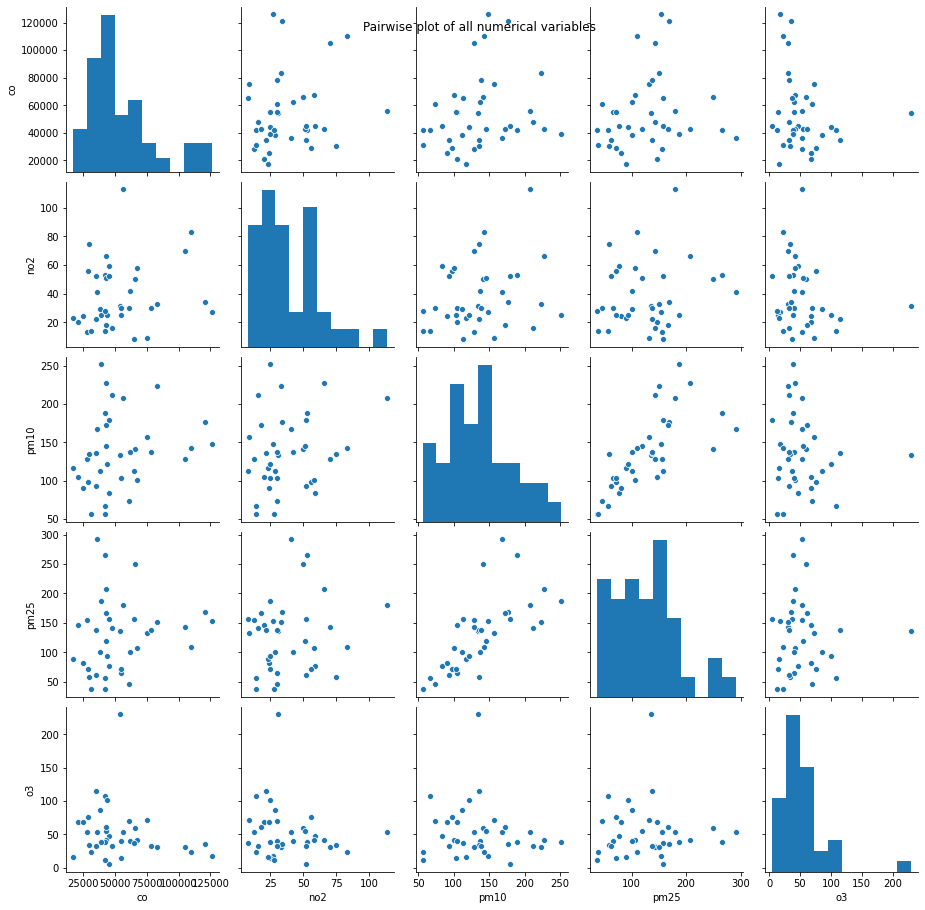

In [179]:
# Pair plot
_ =sns.pairplot(data=df,kind='scatter',dropna=True)
_.fig.suptitle('Pairwise plot of all numerical variables')
# plt.savefig('Pairwise.png')
plt.show()

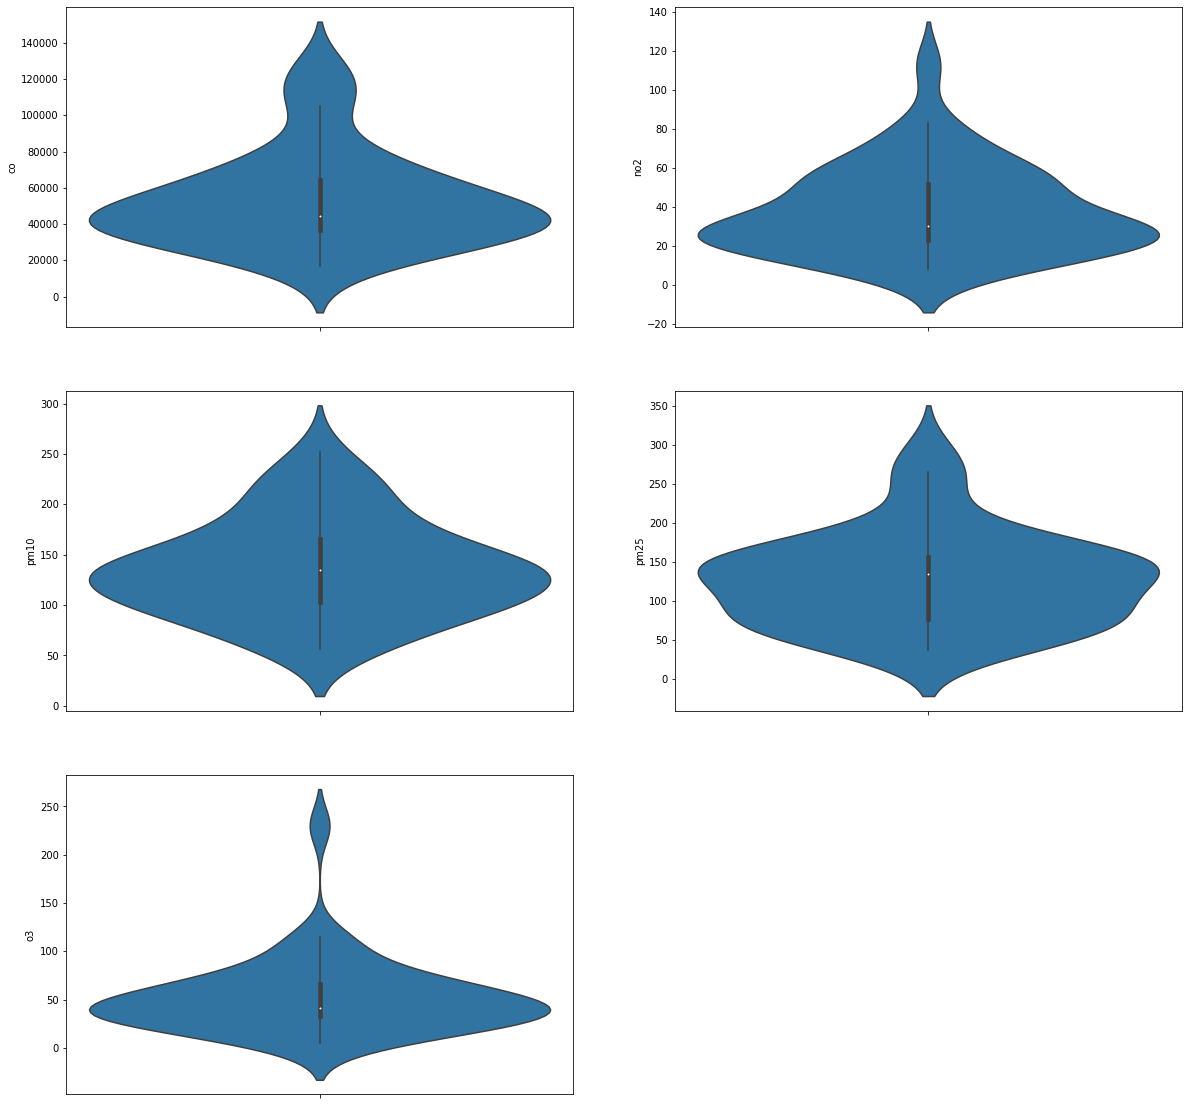

In [180]:
# Violin plot
plt.figure(figsize=(20,20))
plt.subplot(321)
_ = sns.violinplot(y='co',data=df)
plt.subplot(322)
_ = sns.violinplot(y='no2',data=df)
plt.subplot(323)
_ = sns.violinplot(y='pm10',data=df)
plt.subplot(324)
_ = sns.violinplot(y='pm25',data=df)
plt.subplot(325)
_ = sns.violinplot(y='o3',data=df)
plt.savefig('violin.png')
plt.show()

In [181]:
# dropping duplicate values 
df.drop_duplicates(keep=False,inplace=True)

In [182]:
# Missing value analysis
df.isnull().sum()

location    0
city        0
co          0
no2         0
pm10        0
pm25        0
o3          0
dtype: int64

###### No missing values

In [183]:
# Outlier analysis
def outlier_treatment(col):
    ''' calculating outlier indices and replacing them with NA  '''
    #Extract quartiles
    q75, q25 = np.percentile(df[col], [75 ,25])
    print(q75,q25)
    #Calculate IQR
    iqr = q75 - q25
    #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print(minimum,maximum)
    #Replace with NA
    train.loc[train[col] < minimum,col] = np.nan
    train.loc[train[col] > maximum,col] = np.nan

In [184]:
df.isnull().sum()

location    0
city        0
co          0
no2         0
pm10        0
pm25        0
o3          0
dtype: int64

###### No outliers are present.

In [185]:
# Creating dataframe for numerical variables
''''Selecting only continuous numerical variables so for this we select all float datatype 
variable because int datatype represents non-continuous variables and if there is any variable
which having float datatype(ex. variables containing 2.0,3.0 etc values) but is non-continuous'''
num_frame = df.select_dtypes(include=['float'])
num_frame.head(1000)

,co,no2,pm10,pm25,o3
0,48000.0,16.0,212.0,142.0,33.0
1,66000.0,50.0,141.0,250.0,59.0
2,56000.0,113.0,208.0,180.0,53.0
3,45000.0,59.0,84.0,76.0,47.0
4,21000.0,20.0,105.0,146.0,68.0
5,29000.0,56.0,98.0,72.0,76.0
6,43000.0,66.0,228.0,207.0,42.0
7,25000.0,24.0,91.0,81.0,68.0
8,67000.0,58.0,101.0,107.0,42.0
9,28000.0,13.0,128.0,155.0,54.0


In [186]:
# Creating list of column names 
x=list(num_frame.columns)
x

['co', 'no2', 'pm10', 'pm25', 'o3']

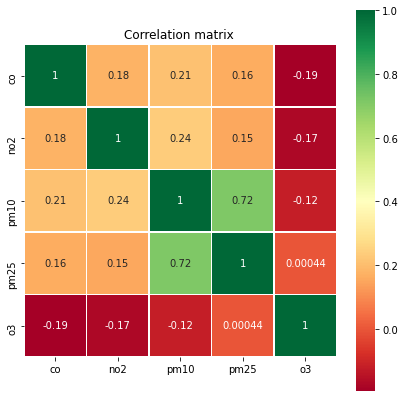

In [187]:
# heatmap using correlation matrix
plt.figure(figsize=(7,7))
_ = sns.heatmap(df[x].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')
# plt.savefig('correlation.png')
plt.show()

In [ ]:
# There is very small correlation between the variables.
# o3 has negative relation with co, no2 and pm10.

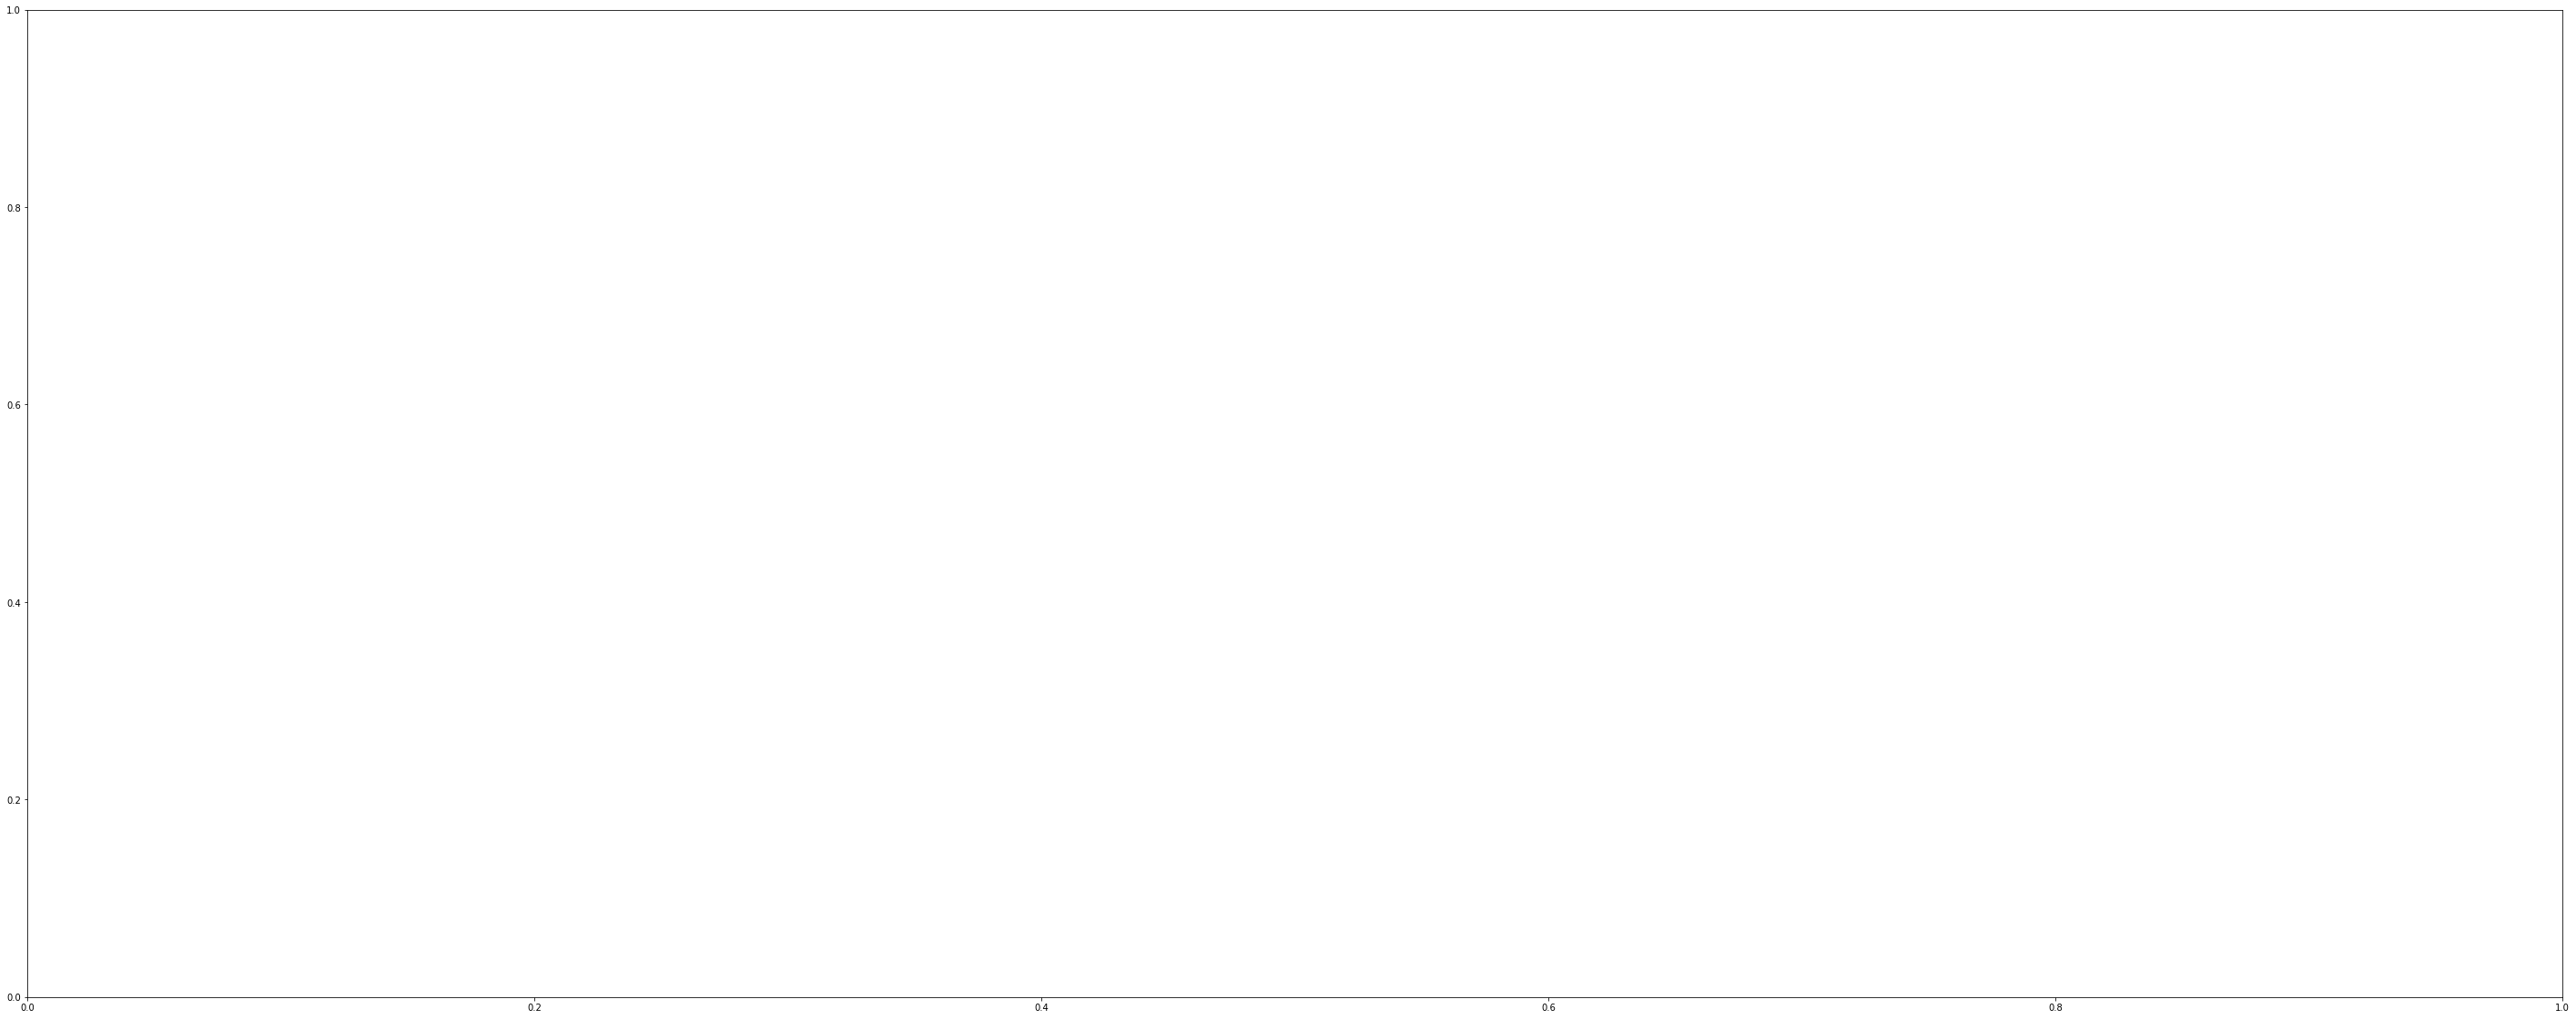

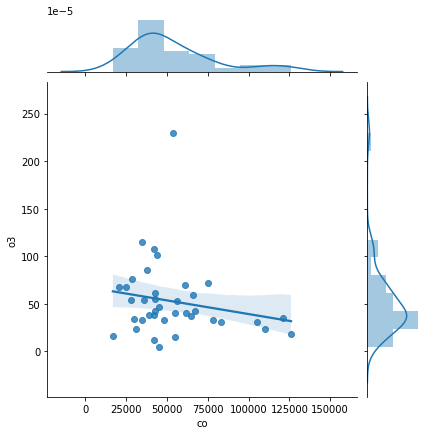

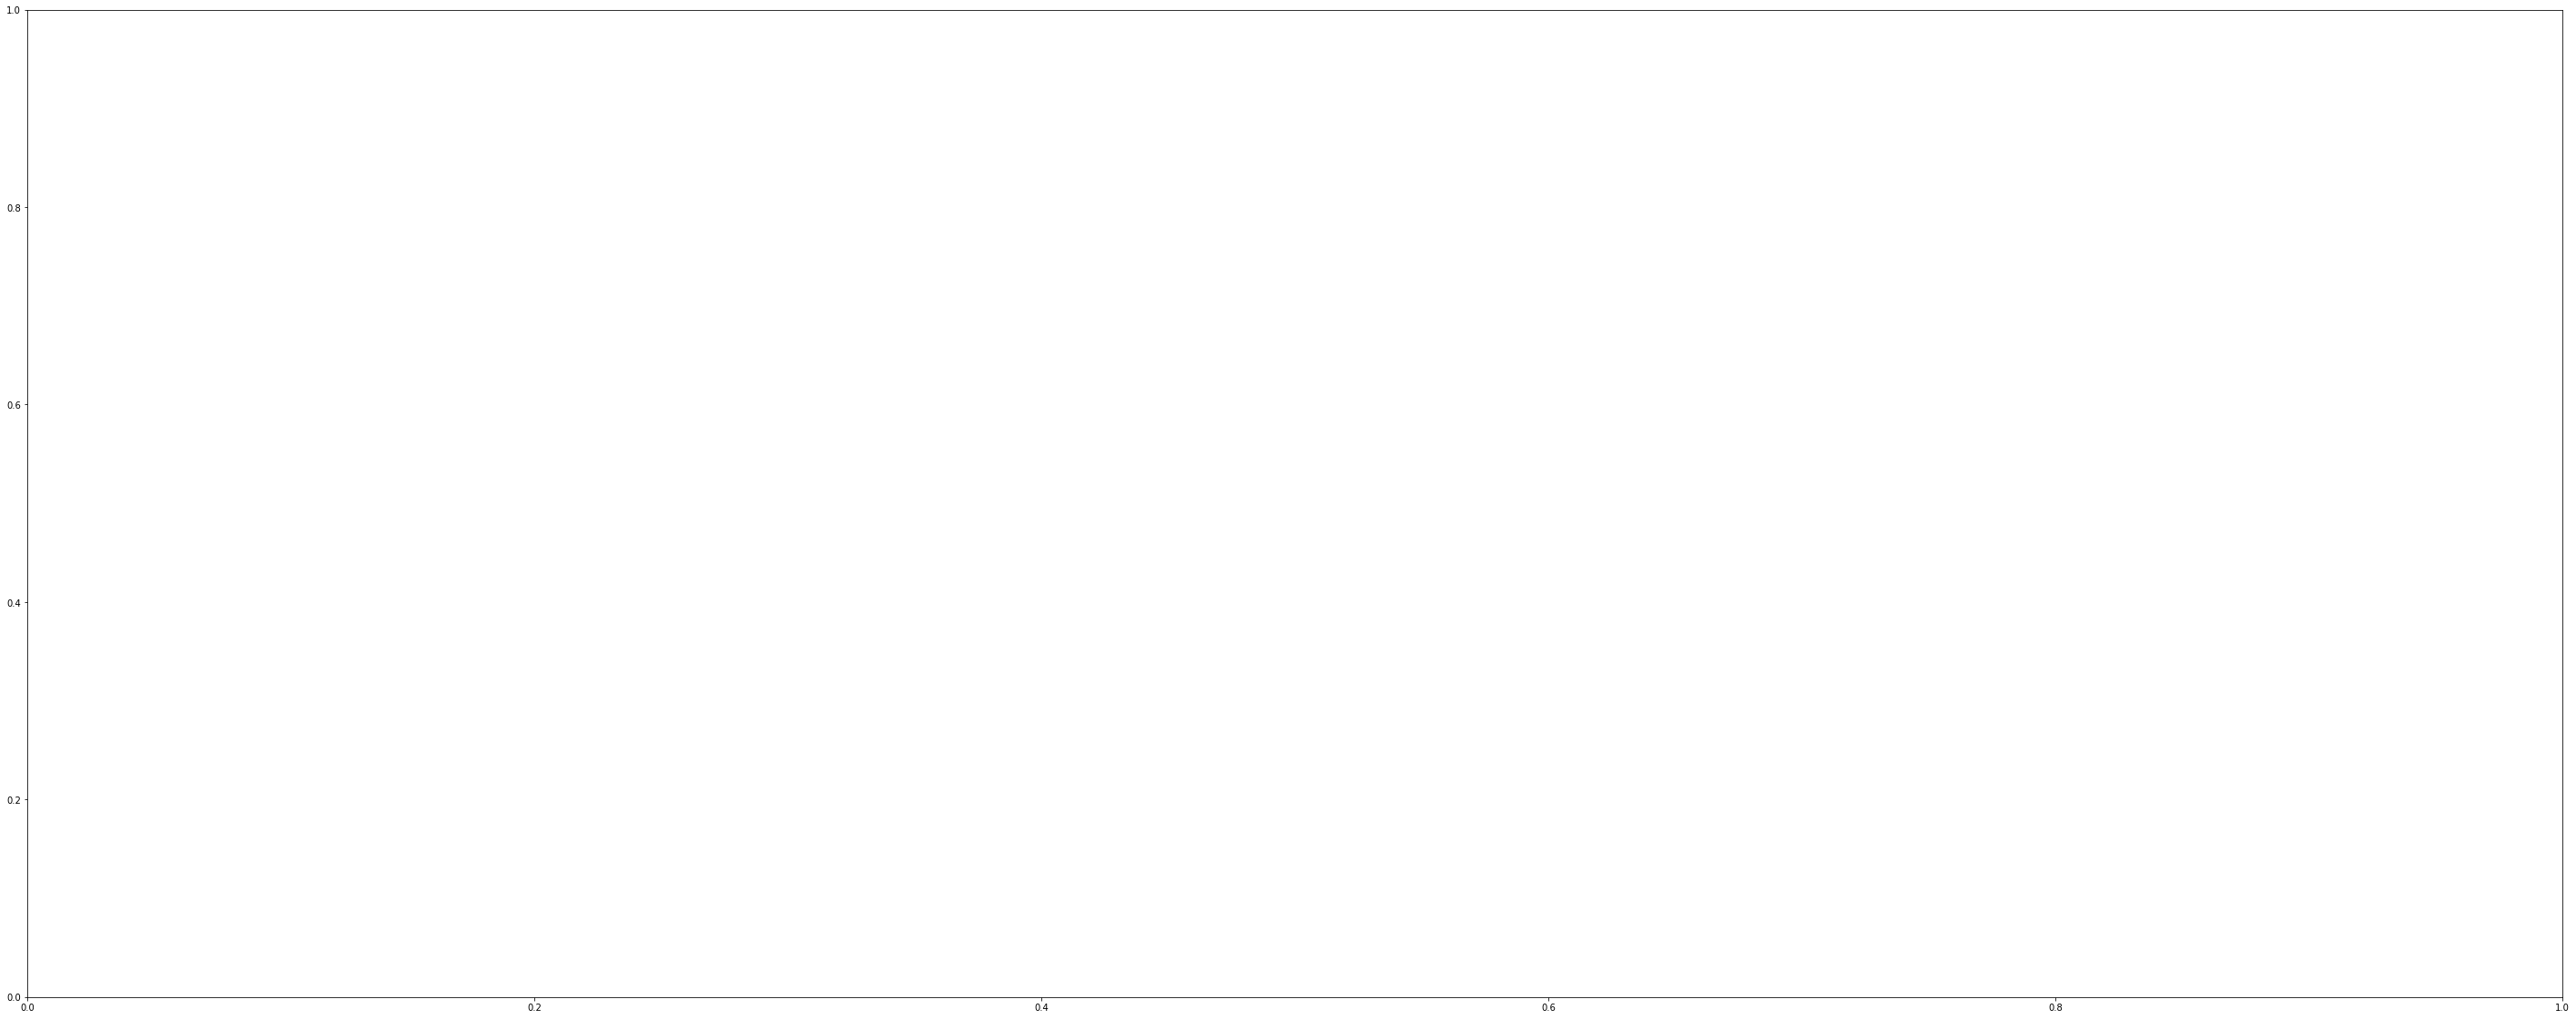

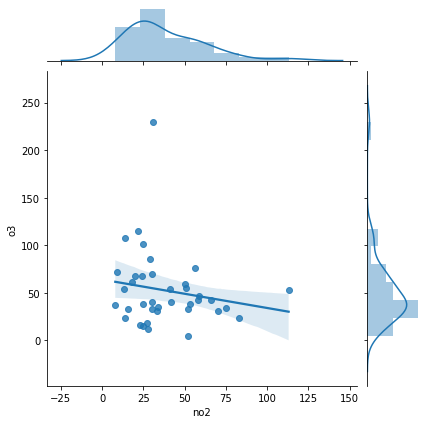

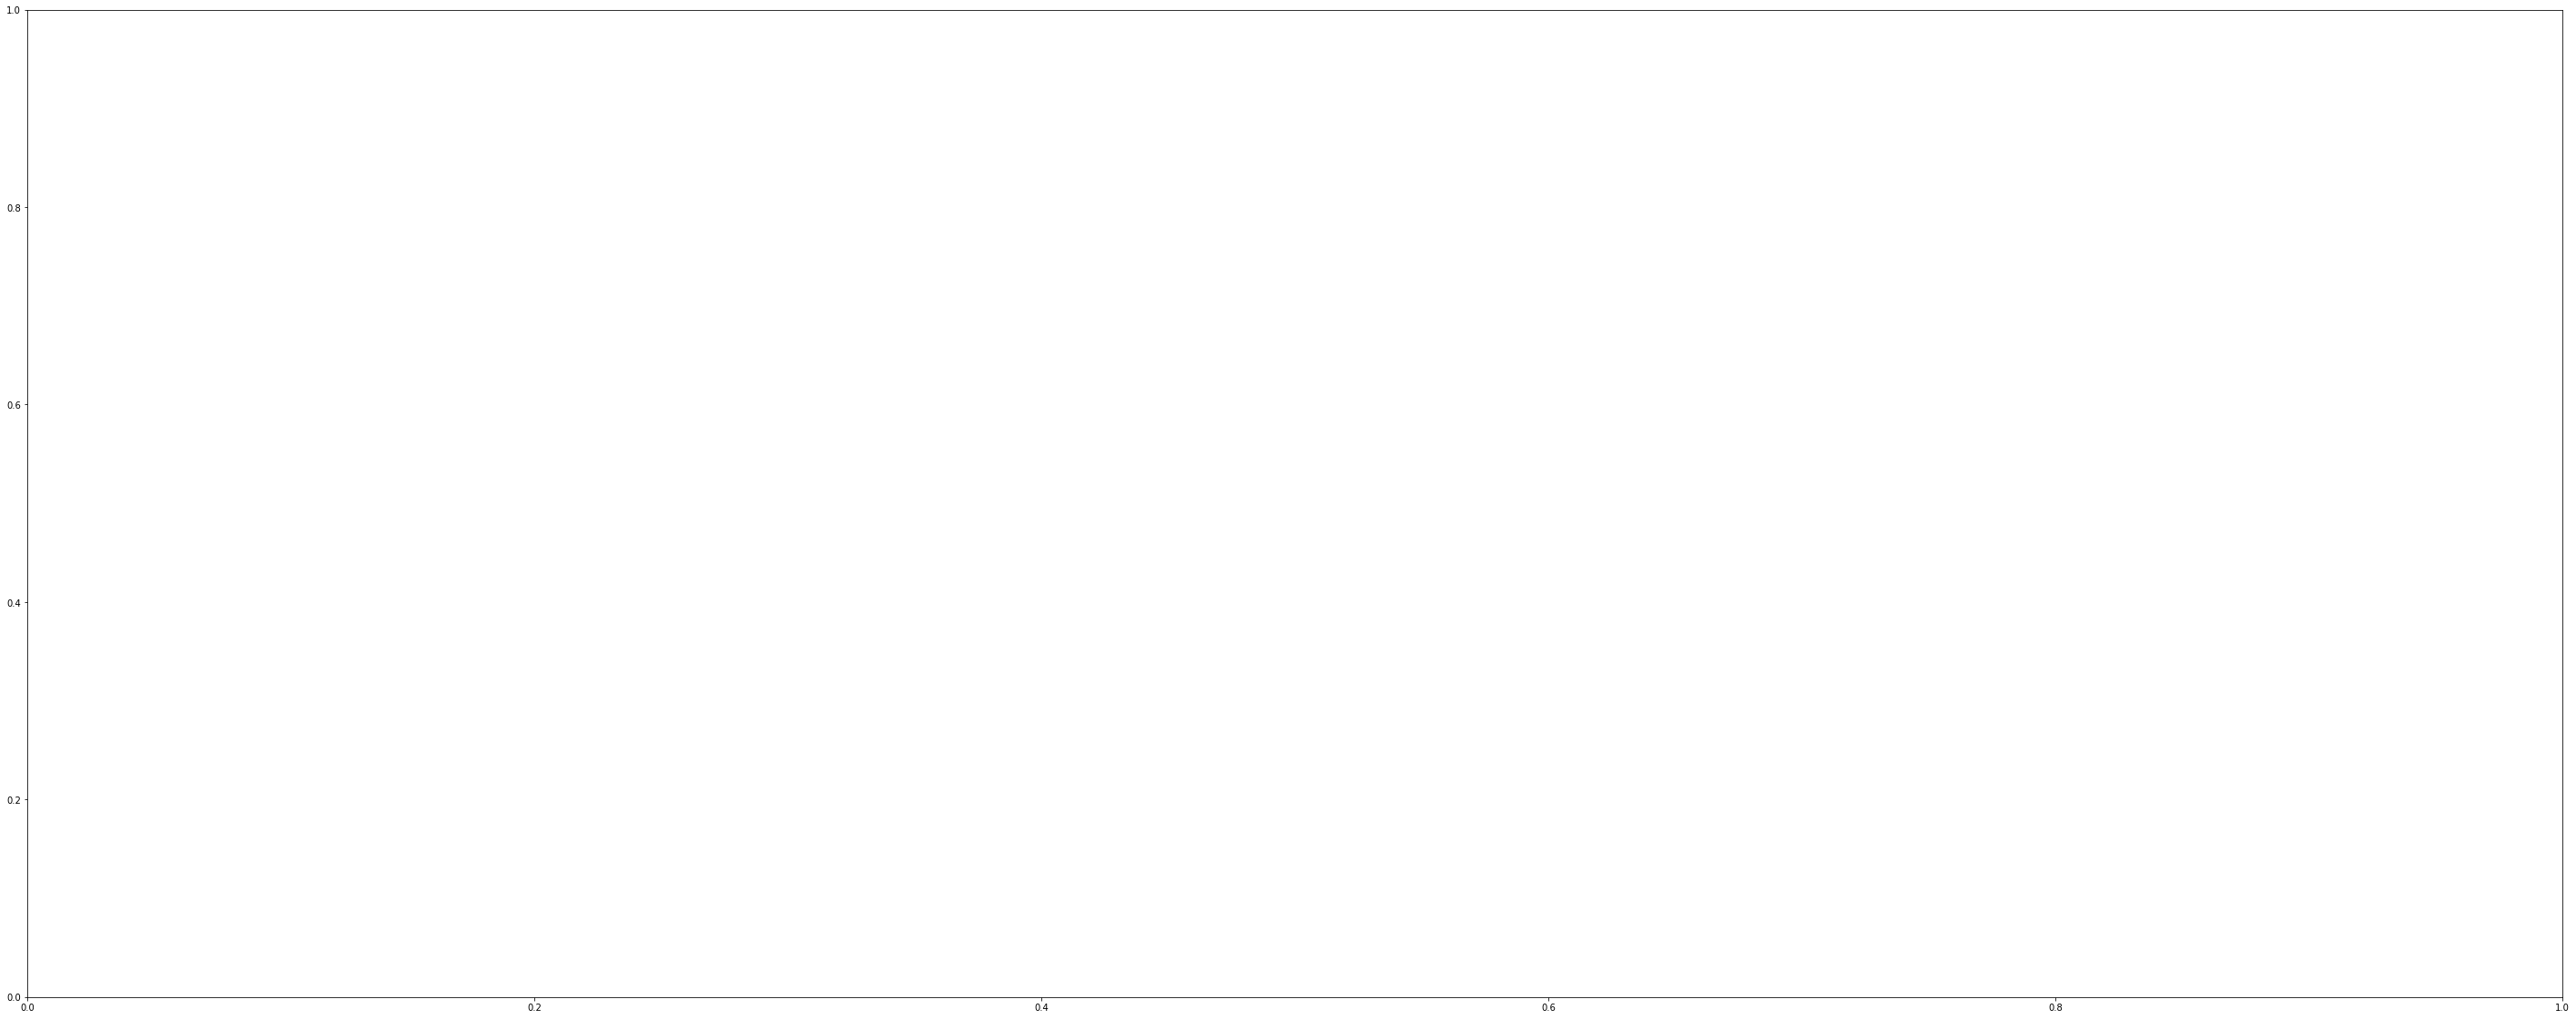

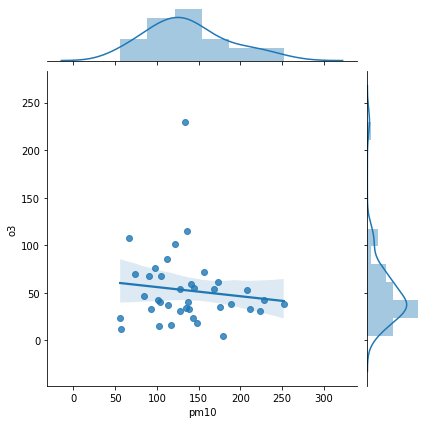

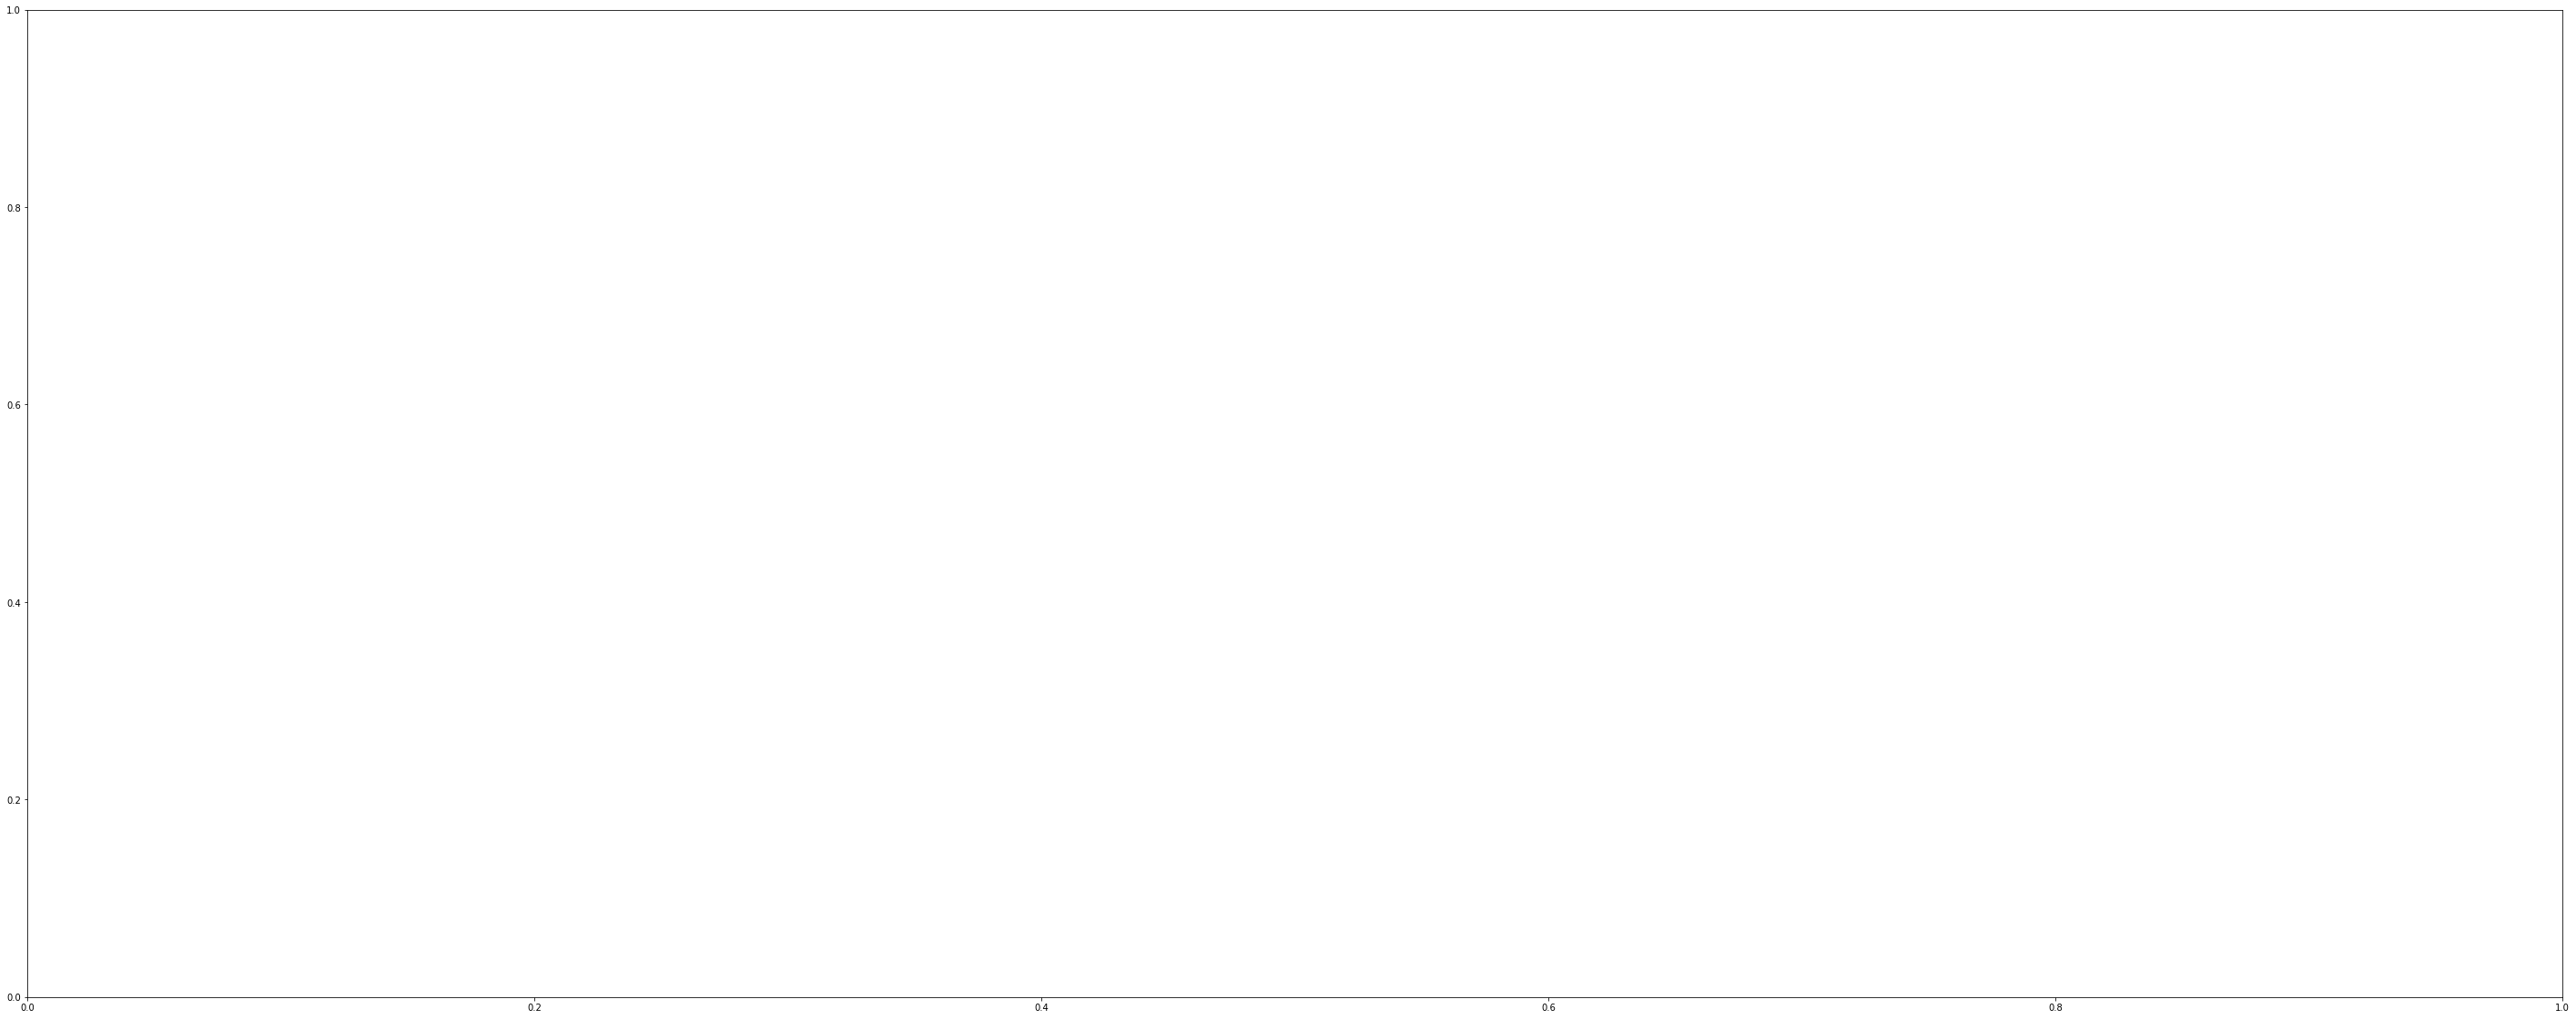

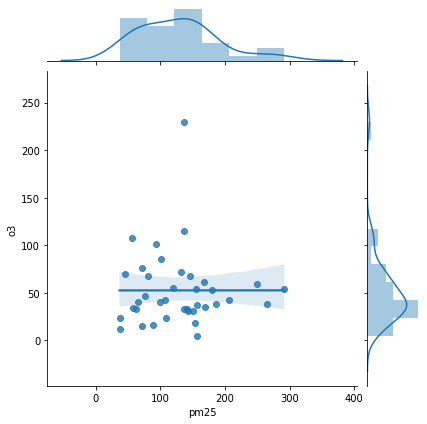

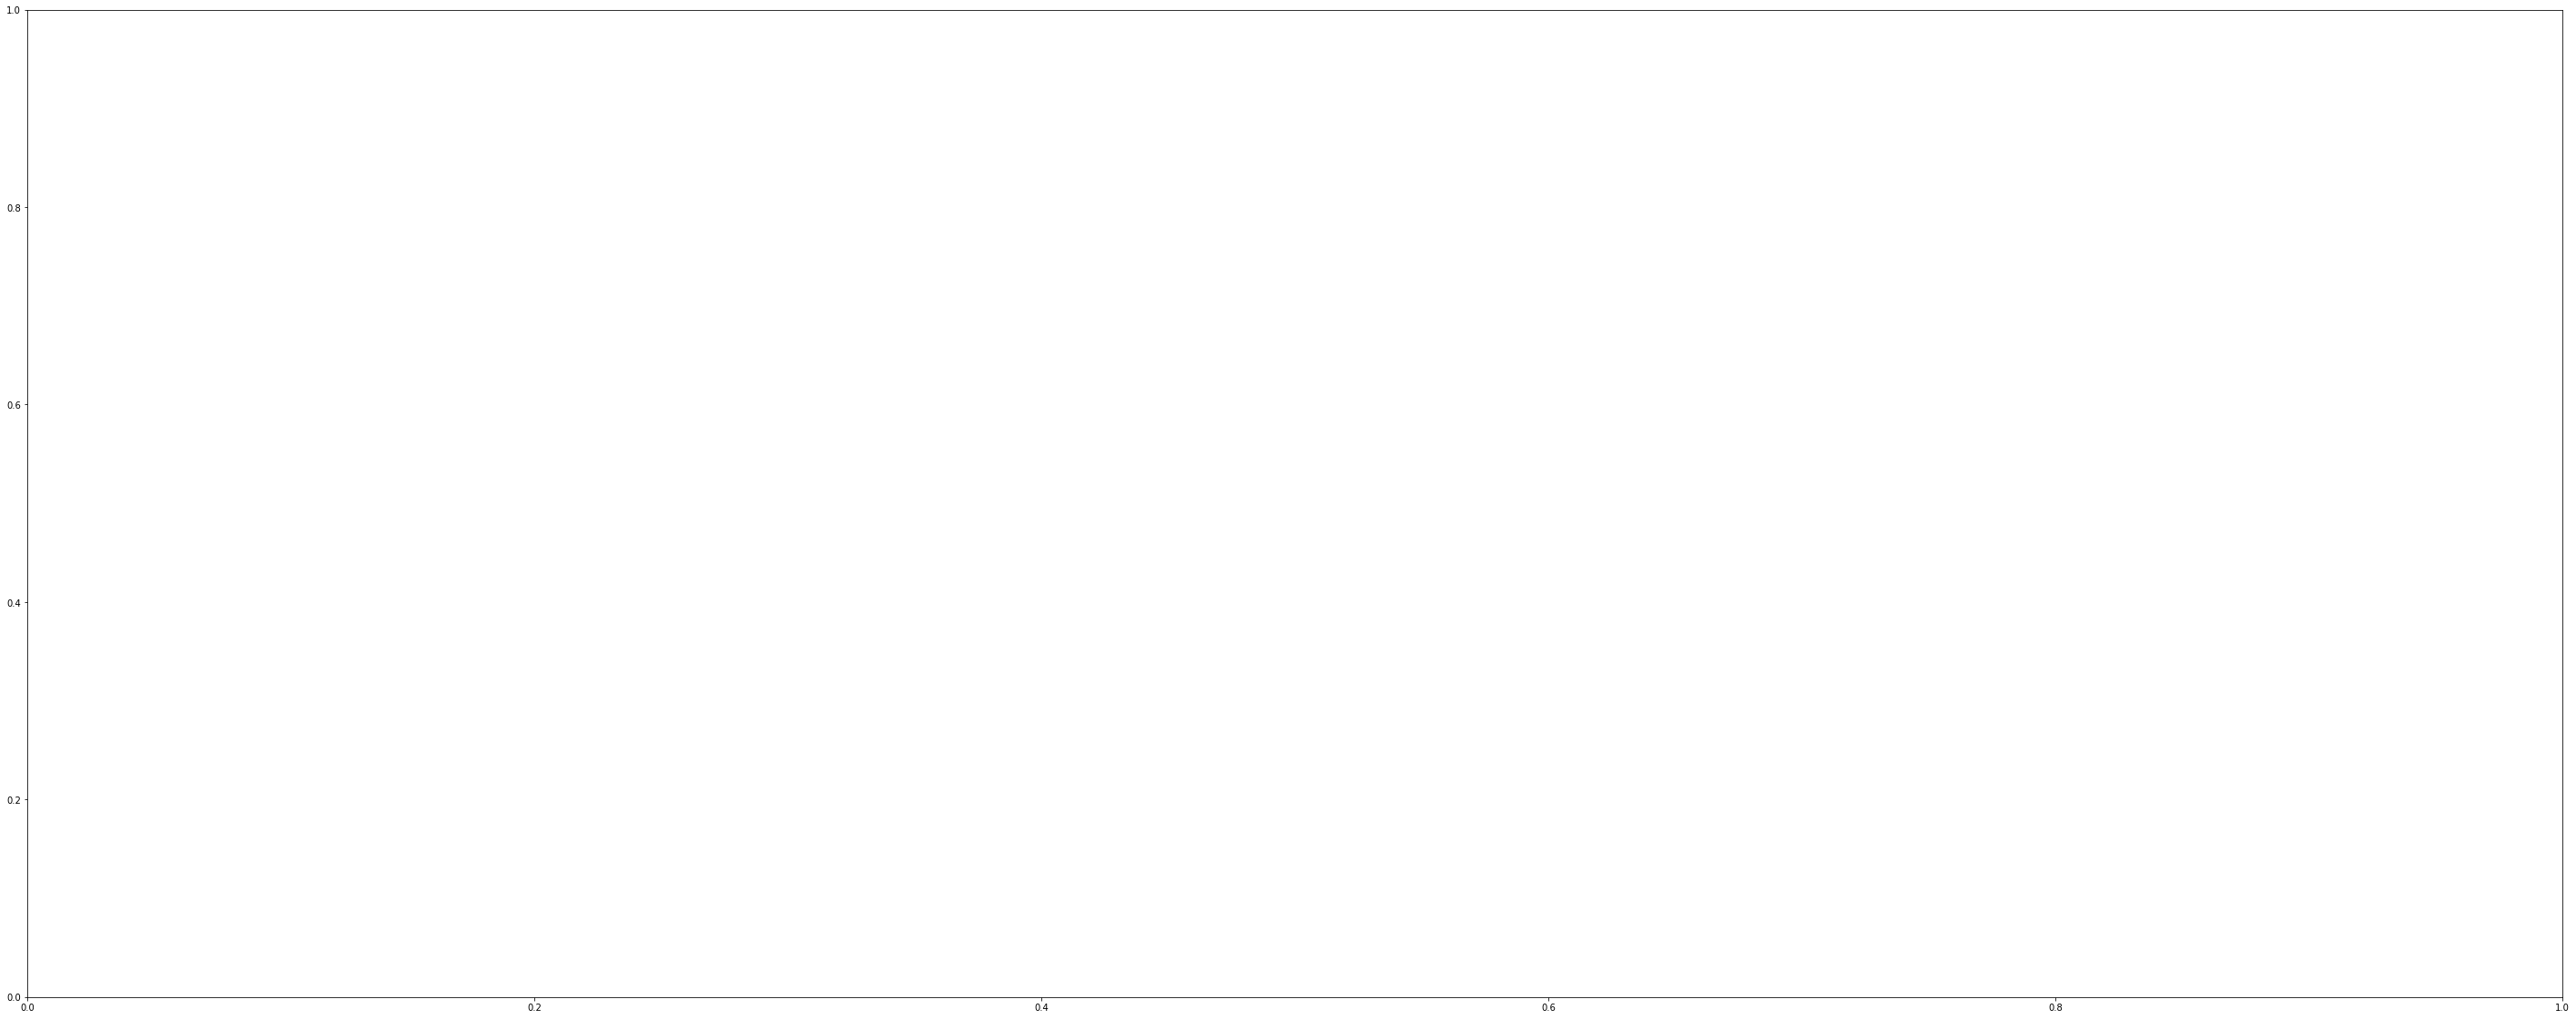

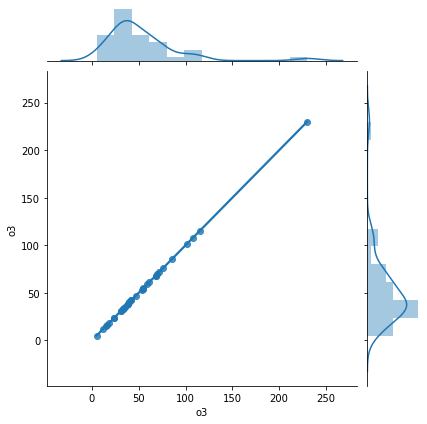

In [188]:
# Loop for Creating box plot for every variable
for i in x:
    plt.figure(figsize=(50,20)) 
    plt.xlim(0,1)
    sns.jointplot(x=num_frame[i],y='o3',data=num_frame,kind='reg')
    plt.show()

In [ ]:
#Conclusion:-
# Concentration of co is the highest among others.
# Concentration of no2 is the lowest among others.
# There is very small correlation between the variables.
# o3 has negative relation with co, no2 and pm10.